In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from loess.loess import Loess

In [2]:
data = pd.read_csv("../../data/prestige.csv")

In [3]:
def loess_plot(
    loess_model: Loess,
    data: pd.DataFrame,
    x_col: str,
    y_col: str,
    filename: str
) -> None:
    fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=100)
    ax.scatter(data[x_col], data[y_col], color="k", s=5)
    ax.grid(True, color="#EEEEEE")
    ax.plot(np.sort(data[x_col]), loess_model.fitted_values[np.argsort(data[x_col])], color="C1", linewidth=3)
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    fig.savefig(f"./images/{filename}.png", dpi=100)

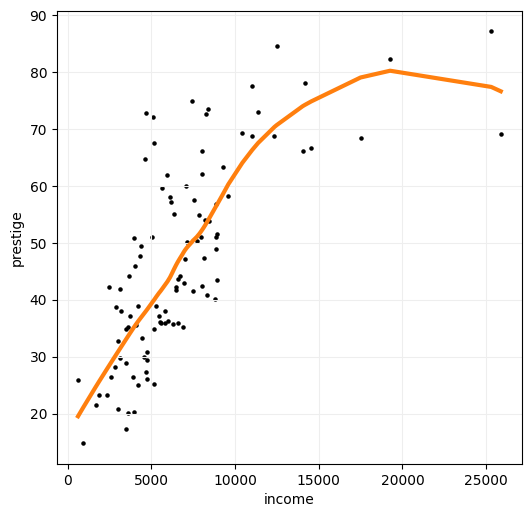

In [4]:
# fit algorithm
loess_m1 = Loess().fit(data.income, data.prestige)
loess_plot(loess_m1, data, "income", "prestige", "python_1")

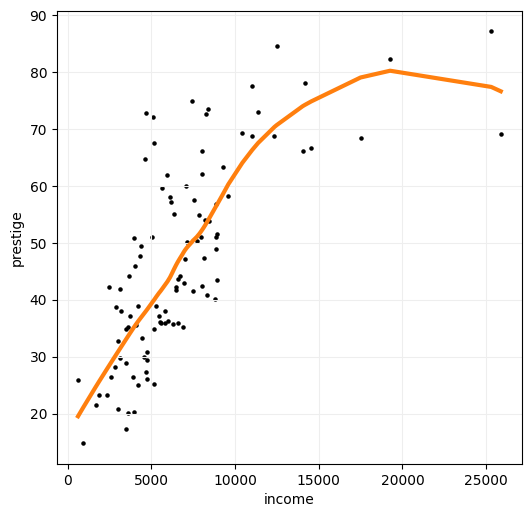

In [5]:
# fit algorithm
loess_m2 = Loess(share_of_points=.3, polynomial_degree=1).fit(data.income, data.prestige)
loess_plot(loess_m1, data, "income", "prestige", "python_2")

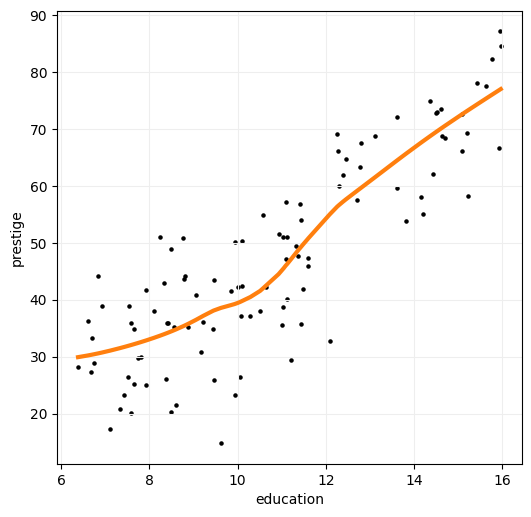

In [6]:
# fit algorithm
loess_m3 = Loess().fit(data.education, data.prestige)
loess_plot(loess_m3, data, "education", "prestige", "python_3")

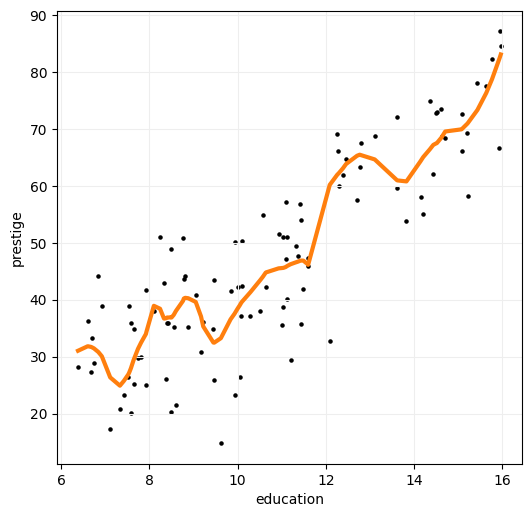

In [7]:
# fit algorithm
loess_m4 = Loess(share_of_points=.2).fit(data.education, data.prestige)
loess_plot(loess_m4, data, "education", "prestige", "python_4")

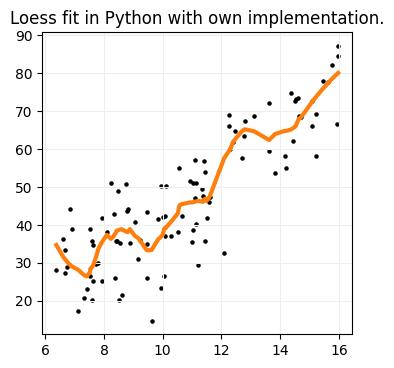

In [8]:
# fit algorithm
loess_m2 = Loess(share_of_points=.2, weighting="constant").fit(data.education, data.prestige)

# plot results
fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=100)
ax.scatter(data.education, data.prestige, color="k", s=5)
ax.plot(np.sort(data.education), loess_m2.fitted_values[np.argsort(data.education)], color="C1", linewidth=3)
ax.grid(True, color="#EEEEEE")
ax.set_title("Loess fit in Python with own implementation.")
fig.savefig("./images/python_loess_education_prestige_2_constant.png", bbox_inches="tight", dpi=100)

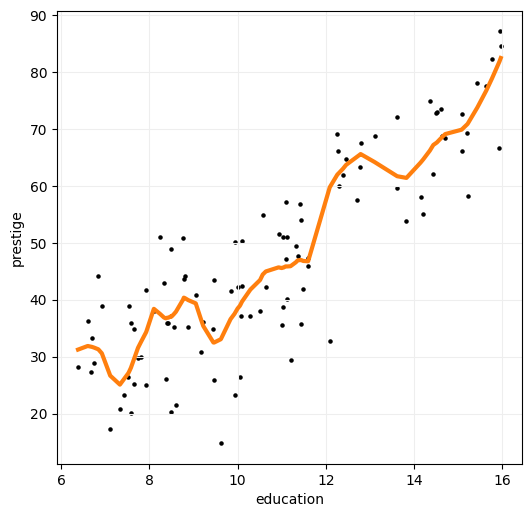

In [9]:
loess_m2 = Loess(share_of_points=.2, weighting="linear").fit(data.education, data.prestige)

loess_plot(loess_m2, data, "education", "prestige", "pyton_4")